<a href="https://colab.research.google.com/github/DEBANGANROY/Vccine_analysis/blob/main/vaccines_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

### Data Collection

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/Practice/datasets/country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
df_real = df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33725 entries, 0 to 33724
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              33725 non-null  object 
 1   iso_code                             33725 non-null  object 
 2   date                                 33725 non-null  object 
 3   total_vaccinations                   18746 non-null  float64
 4   people_vaccinated                    17879 non-null  float64
 5   people_fully_vaccinated              15058 non-null  float64
 6   daily_vaccinations_raw               15449 non-null  float64
 7   daily_vaccinations                   33464 non-null  float64
 8   total_vaccinations_per_hundred       18746 non-null  float64
 9   people_vaccinated_per_hundred        17879 non-null  float64
 10  people_fully_vaccinated_per_hundred  15058 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.874600e+04,1.787900e+04,1.505800e+04,1.544900e+04,3.346400e+04,18746.000000,17879.000000,15058.000000,33464.000000
mean,1.351367e+07,6.211962e+06,3.635993e+06,2.359468e+05,1.179531e+05,31.963971,20.481091,13.646440,3494.270171
std,7.562393e+07,2.277708e+07,1.312727e+07,1.277516e+06,8.497067e+05,37.038693,21.510236,16.999178,4575.530654
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.384602e+05,1.116510e+05,5.237050e+04,4.544000e+03,8.320000e+02,3.350000,2.760000,1.470000,425.000000
50%,9.848220e+05,7.061580e+05,4.022775e+05,2.226400e+04,6.444000e+03,16.595000,11.780000,6.310000,1974.000000
75%,4.775988e+06,3.162285e+06,1.876900e+06,9.946200e+04,3.663500e+04,49.627500,33.915000,20.047500,5242.250000
max,1.583361e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.720000,116.730000,115.990000,118759.000000


In [ ]:
df.shape

(33725, 15)

In [ ]:
df.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     14979
people_vaccinated                      15846
people_fully_vaccinated                18667
daily_vaccinations_raw                 18276
daily_vaccinations                       261
total_vaccinations_per_hundred         14979
people_vaccinated_per_hundred          15846
people_fully_vaccinated_per_hundred    18667
daily_vaccinations_per_million           261
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

### Data Cleaning

In [ ]:
df.fillna(value=0, axis=1, inplace=True)
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
df.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
date = df.date.str.split('-', expand=True)
df['year']= date[0]
df['month']=date[1]

df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.date = pd.to_datetime(df.date)
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2


### vizualize

In [ ]:
col = df.columns
col = col[3:12]
col

Index(['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million'],
      dtype='object')

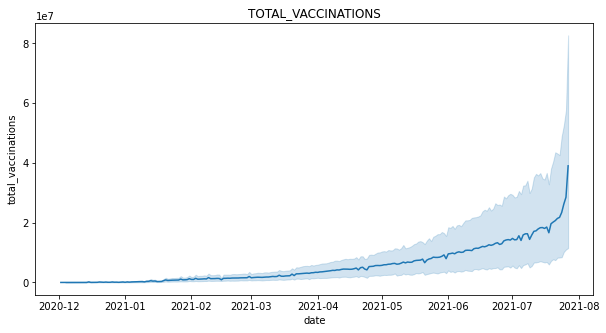

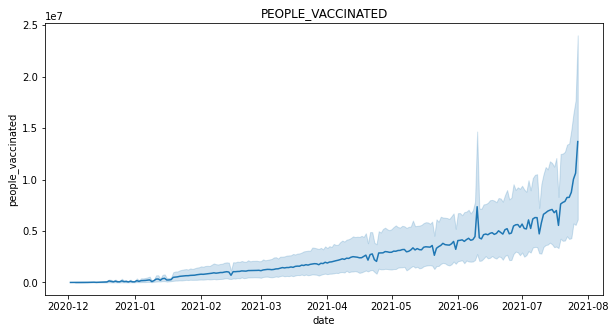

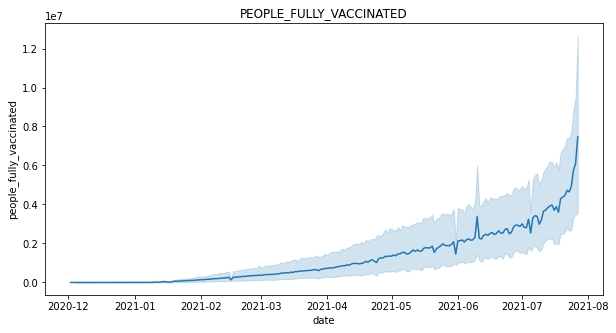

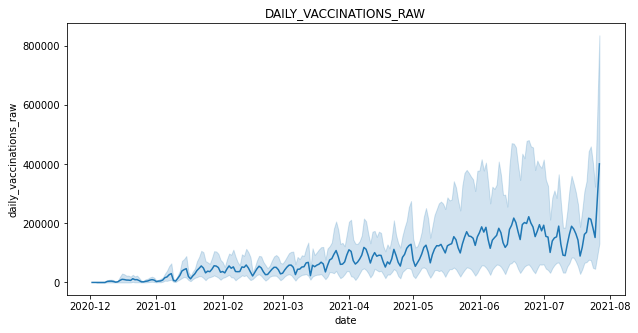

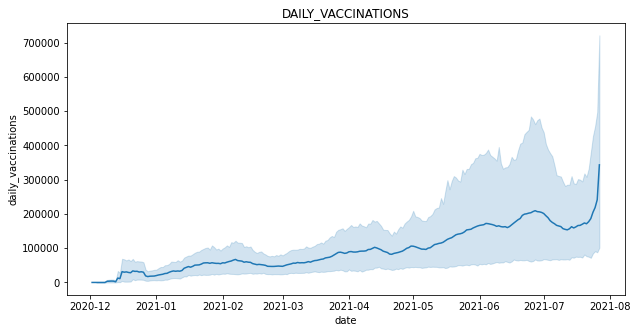

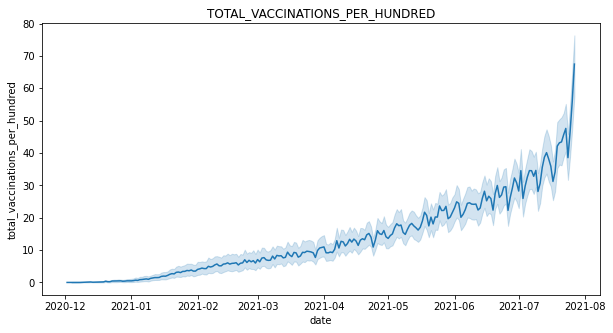

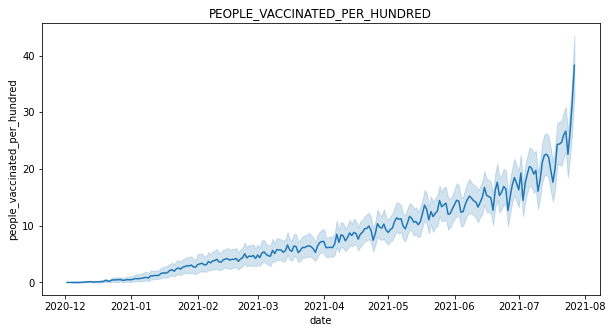

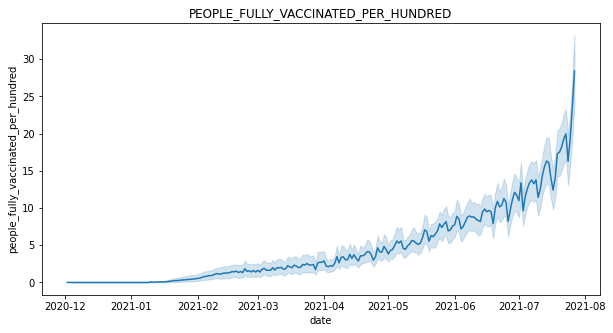

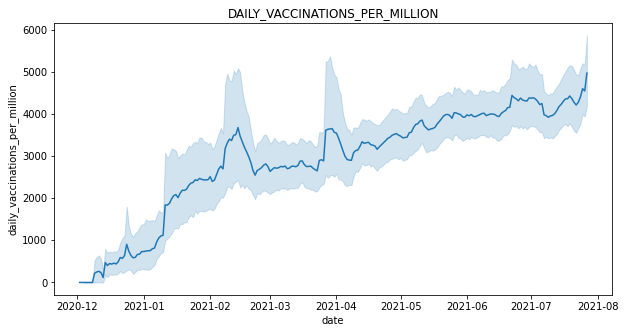

In [ ]:
for i in col:
  plt.figure(figsize=(10,5))
  sns.lineplot(y =df[i] , x= df.date)
  plt.title(i.upper())
  plt.show()